In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

In [2]:
# import the CSV data
df = pd.read_csv('data/stud.csv')
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [3]:
# Preparing X and Y variable
X = df.drop(columns = ['math score'], axis=1)

In [4]:
X.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75


In [5]:
y = df['math score']

In [6]:
y.head()

0    72
1    69
2    90
3    47
4    76
Name: math score, dtype: int64

In [7]:
# Exploring data
print("Categories in gender variable:   ", end=" ")
print(df['gender'].unique())

print("Categories in race/ethnicity variable:   ", end=" ")
print(df['race/ethnicity'].unique())

print("Categories in parental level of education variable:   ", end=" ")
print(df['parental level of education'].unique())

print("Categories in lunch variable:   ", end=" ")
print(df['lunch'].unique())

print("Categories in test preparation course variable:   ", end=" ")
print(df['test preparation course'].unique())

Categories in gender variable:    ['female' 'male']
Categories in race/ethnicity variable:    ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in parental level of education variable:    ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in lunch variable:    ['standard' 'free/reduced']
Categories in test preparation course variable:    ['none' 'completed']


In [8]:
# create column transformer with 3 types of transformer
num_feature = X.select_dtypes(exclude="object").columns
cat_feature = X.select_dtypes(include="object").columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprecessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_feature),
        ("StandarScaler", numeric_transformer, num_feature)
    ]
)

In [9]:
X = preprecessor.fit_transform(X)

In [11]:
X.shape

(1000, 19)

In [12]:
# Train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape

((800, 19), (200, 19))

In [21]:
def evaluate_model(true, predict):
    mae = mean_absolute_error(true, predict)
    mse = mean_squared_error(true, predict)
    rmse = np.sqrt(mse)
    score = r2_score(true, predict)
    return mae, rmse, score

In [22]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(),
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}

model_list = []
r2_list = []

# Iterating using .items() gives you both the name and the object
for model_name, model in models.items():
    model.fit(X_train, y_train) # Model train

    # Make prediction
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Evaluate train and test dataset
    model_train_mae, model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)
    model_test_mae, model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    print(model_name)
    model_list.append(model_name)

    print("Model performance for Training set")
    print("Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("R2 score {:.4f}".format(model_train_r2))

    print("--------------------------------------------")

    print("Model performance for Testing set")
    print("Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("R2 score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)

    print("="*35)
    print("\n")

Linear Regression
Model performance for Training set
Root Mean Squared Error: 5.3231
Mean Absolute Error: 4.2667
R2 score 0.8743
--------------------------------------------
Model performance for Testing set
Root Mean Squared Error: 5.3940
Mean Absolute Error: 4.2148
R2 score: 0.8804


Lasso
Model performance for Training set
Root Mean Squared Error: 6.5938
Mean Absolute Error: 5.2063
R2 score 0.8071
--------------------------------------------
Model performance for Testing set
Root Mean Squared Error: 6.5197
Mean Absolute Error: 5.1579
R2 score: 0.8253


Ridge
Model performance for Training set
Root Mean Squared Error: 5.3233
Mean Absolute Error: 4.2650
R2 score 0.8743
--------------------------------------------
Model performance for Testing set
Root Mean Squared Error: 5.3904
Mean Absolute Error: 4.2111
R2 score: 0.8806


K-Neighbors Regressor
Model performance for Training set
Root Mean Squared Error: 5.7079
Mean Absolute Error: 4.5168
R2 score 0.8555
------------------------------

In [25]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=['R2_Score'], ascending=False)

,Model Name,R2_Score
2,Ridge,0.880593
0,Linear Regression,0.880433
7,CatBoosting Regressor,0.851632
8,AdaBoost Regressor,0.848739
5,Random Forest Regressor,0.848707
6,XGBRegressor,0.827797
1,Lasso,0.825320
3,K-Neighbors Regressor,0.783813
4,Decision Tree,0.737197


In [26]:
# Linear Regression
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(X_train, y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print("Accuracy of the mode is %.2f" %score)

Accuracy of the mode is 88.04


Text(0, 0.5, 'Predict')

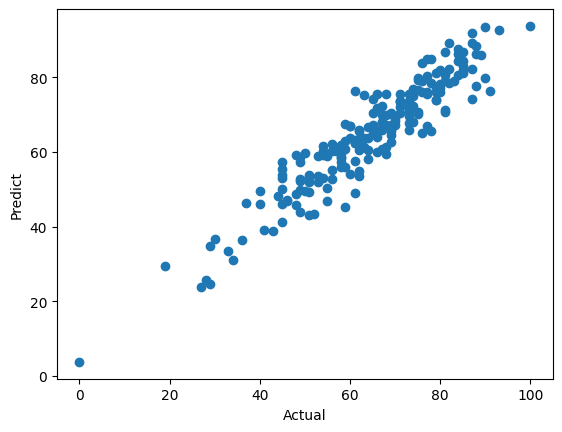

In [27]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual")
plt.ylabel("Predict")

<Axes: xlabel='math score'>

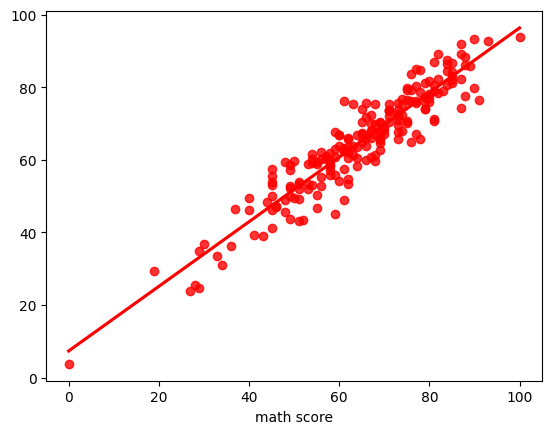

In [28]:
sns.regplot(x=y_test, y=y_pred, ci=None, color='red')

In [29]:
# Difference between actual and predicted values
pred_df = pd.DataFrame({'Actual Value ':y_test, 'Predicted Value': y_pred, 'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
521,91,76.387970,14.612030
737,53,58.885970,-5.885970
740,80,76.990265,3.009735
660,74,76.851804,-2.851804
411,84,87.627378,-3.627378
...,...,...,...
408,52,43.409149,8.590851
332,62,62.152214,-0.152214
208,74,67.888395,6.111605
613,65,67.022287,-2.022287
